In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

### Let's first do analysis of the Test Data

In [12]:
#Read the emails Subjets from excel files
June = pd.read_excel('Email Raw Data_24Sep20 (version 1).xlsx', sheet_name='June-Month', encoding = "ISO-8859-1")
July = pd.read_excel('Email Raw Data_24Sep20 (version 1).xlsx', sheet_name='July-Month', encoding = "ISO-8859-1")
Aug = pd.read_excel('Email Raw Data_24Sep20 (version 1).xlsx', sheet_name='Aug-Month', encoding = "ISO-8859-1")
Sep = pd.read_excel('Email Raw Data_24Sep20 (version 1).xlsx', sheet_name='Sep-Month', encoding = "ISO-8859-1")

In [13]:
#Lets Concat all month in One Data Frame
data=pd.concat([June,July,Aug,Sep],axis=0)

In [14]:
#Lets check head for June month on data
June.head()

,Subject,Sender,DateTimeReceived,Recevied_Date,ToLine,DatetimeReceivedPST,IsComplete,CompletedDate,CompletedBy,Category,StartTime,ReplyTime,Scored Labels
0,RE: Microsoft New Vendor Application - Select...,v-niingo@microsoft.com,2020-06-19T14:50:07+00:00,2020-06-19,Meechee.Kim@microsoft.com;F.ElGharib@selectium...,06/19/2020 07:50:7 AM,NaN,NaT,NaN,Reply,2020-06-15 16:45:56,NaT,New vendor
1,RE: TRIM.20200603.01 - Supplier ID conformatio...,v-parche@microsoft.com,2020-06-19T14:53:12+00:00,2020-06-19,John.Schoonover@microsoft.com;Donald.James@mic...,06/19/2020 07:53:12 AM,NaN,NaT,NaN,NaN,NaT,NaT,CID
2,RE: E-mail approval request - TRIM.20200416.06,v-parche@microsoft.com,2020-06-19T14:56:20+00:00,2020-06-19,Ruchika.Chinda@microsoft.com,06/19/2020 07:56:20 AM,NaN,NaT,NaN,NaN,NaT,NaT,Approval
3,RE: DWT Review Requested – MIRAIT Corporation ...,Neda.Vassey@microsoft.com,2020-06-19T14:59:45+00:00,2020-06-19,lauriemitchel@dwt.com;Deland.Mitchell@microsof...,06/19/2020 07:59:45 AM,1.0,2020-06-22 01:40:05.063,v-vanai@microsoft.com,Followup,2020-06-18 09:18:37,NaT,DWT
4,RE: DWT Review Requested // MANAGEMENT AND CON...,Neda.Vassey@microsoft.com,2020-06-19T15:01:55+00:00,2020-06-19,dwt-msP+C@dwt.com;v-mircon@microsoft.com,06/19/2020 08:01:55 AM,1.0,2020-06-22 08:02:24.000,v-smsalu@microsoft.com,Followup,2020-06-18 09:58:48,NaT,DWT


In [15]:
June.columns

Index(['Subject', 'Sender', 'DateTimeReceived', 'Recevied_Date', 'ToLine',
       'DatetimeReceivedPST', 'IsComplete', 'CompletedDate', 'CompletedBy',
       'Category', 'StartTime', 'ReplyTime', 'Scored Labels'],
      dtype='object')

In [24]:
#Making a list of usuful columns
col=['Sender', 'Recevied_Date', 'ToLine', 'Category','Scored Labels']
June=June[col]

In [25]:
June.head()

,Sender,Recevied_Date,ToLine,Category,Scored Labels
0,v-niingo@microsoft.com,2020-06-19,Meechee.Kim@microsoft.com;F.ElGharib@selectium...,Reply,New vendor
1,v-parche@microsoft.com,2020-06-19,John.Schoonover@microsoft.com;Donald.James@mic...,NaN,CID
2,v-parche@microsoft.com,2020-06-19,Ruchika.Chinda@microsoft.com,NaN,Approval
3,Neda.Vassey@microsoft.com,2020-06-19,lauriemitchel@dwt.com;Deland.Mitchell@microsof...,Followup,DWT
4,Neda.Vassey@microsoft.com,2020-06-19,dwt-msP+C@dwt.com;v-mircon@microsoft.com,Followup,DWT


In [26]:
June[:].nunique()

Sender            729
Recevied_Date      30
ToLine           3746
Category            4
Scored Labels      55
dtype: int64

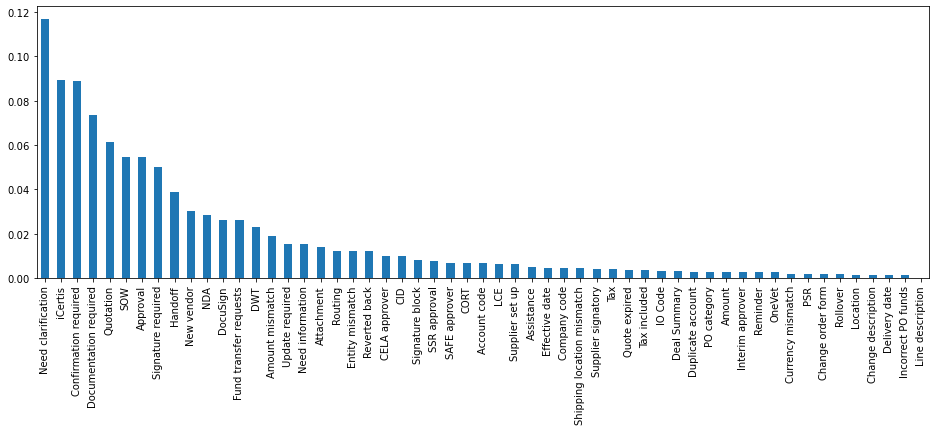

In [27]:
#This Shows in Month of June, emails of "Need Classification" are more than the rest. 
June['Scored Labels'].value_counts(normalize=True).plot.bar(figsize=(16,5))
plt.show()

In [20]:
#Lets check for concat data
data.head()

,Subject,Sender,DateTimeReceived,Recevied_Date,ToLine,DatetimeReceivedPST,IsComplete,CompletedDate,CompletedBy,Category,StartTime,ReplyTime,Scored Labels,Subject_part1,Subject_part2,Subject_part3,Subject_part4,Subject_part5,Subject_part6
0,RE: Microsoft New Vendor Application - Select...,v-niingo@microsoft.com,2020-06-19T14:50:07+00:00,2020-06-19,Meechee.Kim@microsoft.com;F.ElGharib@selectium...,06/19/2020 07:50:7 AM,NaN,NaT,NaN,Reply,2020-06-15 16:45:56,NaT,New vendor,NaN,NaN,NaN,NaN,NaN,NaN
1,RE: TRIM.20200603.01 - Supplier ID conformatio...,v-parche@microsoft.com,2020-06-19T14:53:12+00:00,2020-06-19,John.Schoonover@microsoft.com;Donald.James@mic...,06/19/2020 07:53:12 AM,NaN,NaT,NaN,NaN,NaT,NaT,CID,NaN,NaN,NaN,NaN,NaN,NaN
2,RE: E-mail approval request - TRIM.20200416.06,v-parche@microsoft.com,2020-06-19T14:56:20+00:00,2020-06-19,Ruchika.Chinda@microsoft.com,06/19/2020 07:56:20 AM,NaN,NaT,NaN,NaN,NaT,NaT,Approval,NaN,NaN,NaN,NaN,NaN,NaN
3,RE: DWT Review Requested – MIRAIT Corporation ...,Neda.Vassey@microsoft.com,2020-06-19T14:59:45+00:00,2020-06-19,lauriemitchel@dwt.com;Deland.Mitchell@microsof...,06/19/2020 07:59:45 AM,1.0,2020-06-22 01:40:05.063,v-vanai@microsoft.com,Followup,2020-06-18 09:18:37,NaT,DWT,NaN,NaN,NaN,NaN,NaN,NaN
4,RE: DWT Review Requested // MANAGEMENT AND CON...,Neda.Vassey@microsoft.com,2020-06-19T15:01:55+00:00,2020-06-19,dwt-msP+C@dwt.com;v-mircon@microsoft.com,06/19/2020 08:01:55 AM,1.0,2020-06-22 08:02:24.000,v-smsalu@microsoft.com,Followup,2020-06-18 09:58:48,NaT,DWT,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27260 entries, 0 to 5154
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Subject              27260 non-null  object        
 1   Sender               27260 non-null  object        
 2   DateTimeReceived     27260 non-null  object        
 3   Recevied_Date        27260 non-null  datetime64[ns]
 4   ToLine               27177 non-null  object        
 5   DatetimeReceivedPST  27260 non-null  object        
 6   IsComplete           4323 non-null   float64       
 7   CompletedDate        4323 non-null   datetime64[ns]
 8   CompletedBy          2817 non-null   object        
 9   Category             17923 non-null  object        
 10  StartTime            19661 non-null  datetime64[ns]
 11  ReplyTime            4766 non-null   datetime64[ns]
 12  Scored Labels        27260 non-null  object        
 13  Subject_part1        10790 non-n

In [28]:
#Taking only useful columns
data1=data[col]

In [29]:
data1.head()

,Sender,Recevied_Date,ToLine,Category,Scored Labels
0,v-niingo@microsoft.com,2020-06-19,Meechee.Kim@microsoft.com;F.ElGharib@selectium...,Reply,New vendor
1,v-parche@microsoft.com,2020-06-19,John.Schoonover@microsoft.com;Donald.James@mic...,NaN,CID
2,v-parche@microsoft.com,2020-06-19,Ruchika.Chinda@microsoft.com,NaN,Approval
3,Neda.Vassey@microsoft.com,2020-06-19,lauriemitchel@dwt.com;Deland.Mitchell@microsof...,Followup,DWT
4,Neda.Vassey@microsoft.com,2020-06-19,dwt-msP+C@dwt.com;v-mircon@microsoft.com,Followup,DWT


In [30]:
data1.to_csv('Concat_all.csv',index=0,columns=data1.columns)

In [31]:
data2=pd.read_csv('Concat_all.csv',encoding="ISO-8859-1")

In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27260 entries, 0 to 27259
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sender         27260 non-null  object
 1   Recevied_Date  27260 non-null  object
 2   ToLine         27177 non-null  object
 3   Category       17923 non-null  object
 4   Scored_Labels  27260 non-null  object
 5   ToLine1        27177 non-null  object
 6   ToLine2        14749 non-null  object
 7   ToLine3        7729 non-null   object
 8   ToLine4        4285 non-null   object
 9   ToLine5        2655 non-null   object
 10  ToLine6        1664 non-null   object
 11  ToLine7        1186 non-null   object
 12  ToLine8        834 non-null    object
 13  ToLine9        763 non-null    object
 14  ToLine10       713 non-null    object
 15  ToLine11       664 non-null    object
 16  ToLine12       636 non-null    object
 17  ToLine13       39 non-null     object
 18  ToLine14       30 non-null

In [33]:
data2.columns

Index(['Sender', 'Recevied_Date', 'ToLine', 'Category', 'Scored_Labels',
       'ToLine1', 'ToLine2', 'ToLine3', 'ToLine4', 'ToLine5', 'ToLine6',
       'ToLine7', 'ToLine8', 'ToLine9', 'ToLine10', 'ToLine11', 'ToLine12',
       'ToLine13', 'ToLine14', 'ToLine15', 'ToLine16', 'ToLine17', 'ToLine18'],
      dtype='object')

In [35]:
#At first Will consider only One person in the ToLine so that would be ToLine1. 
data2.drop([ 'ToLine','ToLine2', 'ToLine3', 'ToLine4', 'ToLine5', 'ToLine6',
       'ToLine7', 'ToLine8', 'ToLine9', 'ToLine10', 'ToLine11', 'ToLine12',
       'ToLine13', 'ToLine14', 'ToLine15', 'ToLine16', 'ToLine17', 'ToLine18'],axis=1,inplace=True)

In [37]:
data2.head()

,Sender,Recevied_Date,Category,Scored_Labels,ToLine1
0,v-niingo@microsoft.com,6/19/2020,Reply,New vendor,Meechee.Kim
1,v-parche@microsoft.com,6/19/2020,NaN,CID,John.Schoonover
2,v-parche@microsoft.com,6/19/2020,NaN,Approval,Ruchika.Chinda
3,Neda.Vassey@microsoft.com,6/19/2020,Followup,DWT,lauriemitchel
4,Neda.Vassey@microsoft.com,6/19/2020,Followup,DWT,dwt-msP+C


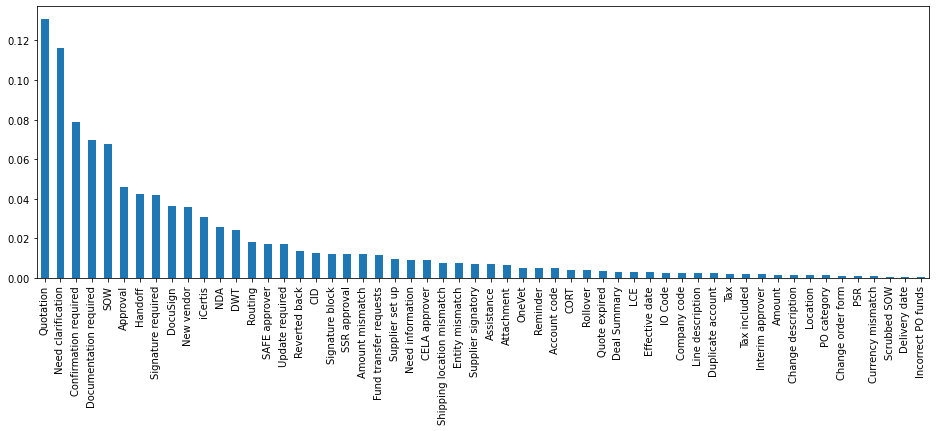

In [38]:
#This Shows in Month of June, emails of "Need Classification" are more than the rest. 
data2['Scored_Labels'].value_counts(normalize=True).plot.bar(figsize=(16,5))
plt.show()

In [40]:
data2[:].nunique()

Sender           1342
Recevied_Date     115
Category            4
Scored_Labels      56
ToLine1          1676
dtype: int64

In [42]:
Quotation= data2[data2['Scored_Labels']=='Quotation']

In [48]:
Quotation['ToLine1'].value_counts()

v-pradn        135
v-prasma       135
v-shvaib       134
v-lashir       110
v-pakotu       109
              ... 
harshadj         1
Eric.Keiser      1
bburkh           1
v-jemoor         1
brmil            1
Name: ToLine1, Length: 412, dtype: int64